In [1]:
import ROOT
from IPython.display import Image, display

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spopt
from scipy.stats import norm
import matplotlib.mlab as mlab
import pandas as pd
import glob

from IPython.display import display, Math, Latex
def print_math(string):
    display(Math(string))

path_to_data = '/Users/kirillivanov/Documents/Docker/geant/Geant4-10.5.1/examples/basic/B4/B4a-build2/'

Welcome to JupyROOT 6.18/00


In [36]:
Egap = ROOT.RooRealVar('Egap', 'E_{gap}, [MeV]', 0, 620)
Ereal = ROOT.RooRealVar('Eabs', 'E_{abs}, [MeV]', 0, 12000)
energy = [100, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

varset_g = ROOT.RooArgSet(Egap)

In [3]:
ds_list = []
mean0_list = []
sigma0_list = []

for i in range(0, 11):
    filename = f'{i}Gev'
    file = ROOT.TFile(path_to_data + filename + '.root')
    ds = ROOT.RooDataSet(f'data{i}', '', file.Get('B4'), varset_g)
    ds_list.append(ds)
    mean0_list.append(ds.mean(Egap))
    sigma0_list.append(ds.sigma(Egap))
    print(f'{i}-ds: mean0 = {mean0_list[i]}, sigma0 = {sigma0_list[i]}')

0-ds: mean0 = 4.148804807508352, sigma0 = 2.987721155060413
1-ds: mean0 = 48.15400547058493, sigma0 = 10.197475573623768
2-ds: mean0 = 98.45503595959258, sigma0 = 14.715561464677876
3-ds: mean0 = 146.70747734659614, sigma0 = 17.44016890780711
4-ds: mean0 = 195.45286386551777, sigma0 = 20.50078026474376
5-ds: mean0 = 245.00938235235276, sigma0 = 21.974159149020174
6-ds: mean0 = 292.9809113135249, sigma0 = 25.461405015618503
7-ds: mean0 = 341.44049163601466, sigma0 = 26.16959806018399
8-ds: mean0 = 391.15550742809563, sigma0 = 28.10067257093031
9-ds: mean0 = 438.9434363935678, sigma0 = 32.57616883616201
10-ds: mean0 = 486.36264375910235, sigma0 = 32.79456306803501


In [57]:
mean_list = []
sigma_list = []
gaus_calib_list = []

for i in range(0, 11):
    m = mean0_list[i]
    s = sigma0_list[i]
    mean_ecalib  = ROOT.RooRealVar ('mean_ecalib' , 'mean ', m, 0.2 * m  , 2 * m)
    sigma_ecalib = ROOT.RooRealVar ('sigma_ecalib', 'sigma', 3 * s, 0.2 * s , 10 * s)

    pdf_ecalib   = ROOT.RooGaussian('pdfEcalib'   , 'gaus', Egap, mean_ecalib, sigma_ecalib)
    
    fit_r = pdf_ecalib.fitTo(ds_list[i], ROOT.RooFit.NumCPU(7), ROOT.RooFit.PrintLevel(-1), ROOT.RooFit.Save())
    fit_r.Print()
    
    gaus_calib_list.append(pdf_ecalib)
    mean_list.append(mean_ecalib.getVal())
    sigma_list.append(mean_ecalib.getError())

for i in range(0, 11):
    print(f'{i}-ds: mean = {mean_list[i]} +- {sigma_list[i]}')

0-ds: mean = 1.2981933468049334 +- 0.5014222878697443
1-ds: mean = 48.153947767088084 +- 0.322477421041512
2-ds: mean = 98.45503564298326 +- 0.4653433624121064
3-ds: mean = 146.70747706803792 +- 0.5515339485766333
4-ds: mean = 195.4528635741873 +- 0.6482933066509275
5-ds: mean = 245.00938207765324 +- 0.6948952901321093
6-ds: mean = 292.98091094191375 +- 0.8051553738958432
7-ds: mean = 341.4404913434761 +- 0.8275797632198305
8-ds: mean = 391.15550715559675 +- 0.8885879478850143
9-ds: mean = 438.94343853843293 +- 1.0301257723682227
10-ds: mean = 486.3658279643245 +- 1.0374703708835682
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 7 remote server process.
[#1] INFO:Minization -- RooMinimizer::optimizeConst: deactivating const optimization

  RooFitResult: minimized FCN value: 2355.38, estimated distance to minimum: 3.70258e-06
                covariance matrix quality: Full, accurate covariance

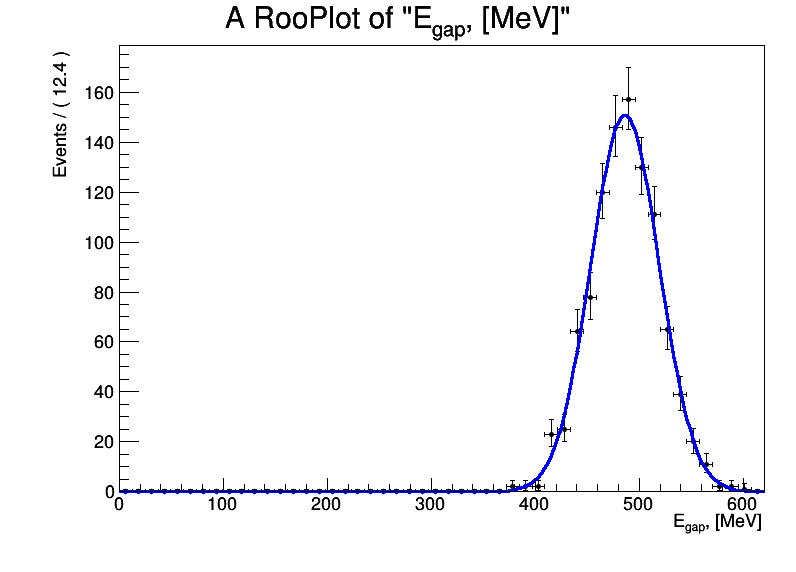

Info in <TCanvas::Print>: png file images/png/test_for_output_ds.png has been created
Info in <TCanvas::Print>: pdf file images/pdf/test_for_output_ds.pdf has been created


In [5]:
bufram = Egap.frame(50)

_MYW = 800
_MYH = 600
_MYT = 0.08*_MYH
_MYB = 0.14*_MYH
_MYL = 0.15*_MYW
_MYR = 0.04*_MYW

cB = ROOT.TCanvas('cB','cB',_MYW,_MYH)
cB.SetLeftMargin( _MYL/_MYW )
cB.SetRightMargin( _MYR/_MYW )
cB.SetTopMargin( _MYT/_MYH )
cB.SetBottomMargin( _MYB/_MYH )
cB.SetTickx(0)
cB.SetTicky(0)
bufram.GetYaxis().SetTitleOffset(1.3)

# for i in range(0, 11):
#     ds_list[i].plotOn(bufram, ROOT.RooFit.MarkerSize(0.6), ROOT.RooFit.Name('data'))

ds_list[10].plotOn(bufram, ROOT.RooFit.MarkerSize(0.6), ROOT.RooFit.Name('data'))
gaus_calib_list[10].plotOn(bufram)
# pdf_ecalib.plotOn(bufram)
bufram.Draw()

cB.SaveAs('images/png/test_for_output_ds.png')
cB.SaveAs('images/pdf/test_for_output_ds.pdf')
display(Image(filename = 'images/png/test_for_output_ds.png', retina = False, width = 550))

In [6]:
calib_log = []
columns_list = ['Energy, MeV', 'Sigma(E), MeV', 'E_gap, MeV', 'Sigma(E_gap), MeV']
df = pd.DataFrame(columns = columns_list)

for i in range(0, 11):
    a_log = [energy[i], 0, mean_list[i], sigma_list[i]]
    df.loc[i] = a_log
    
df.to_csv('log.csv', index = False)

### Then we fit exported SCV with linear function in Wolfram Matematica and show fit output below

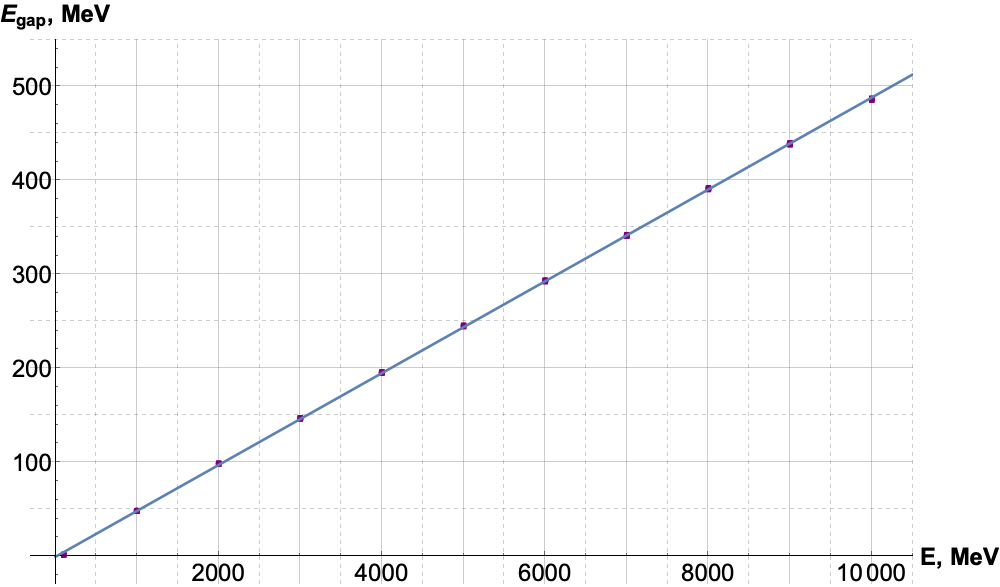

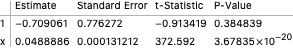

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
display(Image(filename = 'images/png/calib.png', retina = False, width = 550))
display(Image(filename = 'images/png/fit_res.png', retina = False, width = 550))
res = pd.read_csv('fit_res.csv', header=None)
a, b = res.iloc[1][0], res.iloc[0][0]
print_math(r'Fit \; function: \quad E_{gap} = aE + b,')
print_math(f'Where \quad a = {round(a, 5)}, \quad  b = {round(b, 5)}')

In [80]:
# import random

# new_energy = []
# new_energy.append(round(random.uniform(100, 500)))
# for i in range(0, 10):
#     new_energy.append(round(random.uniform(0 + 1000 * i, 1000 * (i + 1))))
# new_energy

[146, 539, 1027, 2936, 3532, 4134, 5007, 6305, 7175, 8017, 9763]

In [37]:
new_energy = [146, 539, 1027, 2936, 3532, 4134, 5007, 6305, 7175, 8017, 9763]

varset_r = ROOT.RooArgSet(Egap, Ereal)
def get_calibrated(Egap):
    E_abs = (Egap - b) / a
    return(E_abs)

In [38]:
ds_red_list = []
mean0_red_list = []
sigma0_red_list = []

for i in range(0, 11):
    ch = ROOT.TChain('B4')
    filename = f'{i}re'
    file = glob.glob(path_to_data + filename + '.root')
    ch.Add(file[0])
    nEvt = ch.GetEntries()

    ds_red = ROOT.RooDataSet(f'data{i}', 'Dataset', varset_r)
    flag_empty = 1

    for evt in range(nEvt):
        if ch.GetEntry(evt) <= 0:
            break

        if (flag_empty != 1): # if new & !0, Write
            ds_red.add(varset_r)
            flag_empty = 1  # now empty and reset par

        Ereal.setVal(get_calibrated(ch.Egap))
        Egap.setVal(ch.Egap)
        flag_empty = 0

    if flag_empty != 1:
        ds_red.add(varset_r)  # write last event if needed 
    
    ds_red_list.append(ds_red)
    mean0_red_list.append(ds_red.mean(Ereal))
    sigma0_red_list.append(ds_red.sigma(Ereal))
    print(f'{i}-ds: mean0 = {mean0_red_list[i]}, sigma0 = {sigma0_red_list[i]}')

0-ds: mean0 = 148.73790861224387, sigma0 = 77.36470930091456
1-ds: mean0 = 551.5805526358529, sigma0 = 151.60027233779923
2-ds: mean0 = 1027.2315386564944, sigma0 = 208.87889722305752
3-ds: mean0 = 2973.501739096739, sigma0 = 354.91728399231613
4-ds: mean0 = 3541.660069575751, sigma0 = 374.6918018553027
5-ds: mean0 = 4141.340195395611, sigma0 = 429.82346141693625
6-ds: mean0 = 5031.3573270719435, sigma0 = 455.24963376827066
7-ds: mean0 = 6324.431613527431, sigma0 = 527.5680974095077
8-ds: mean0 = 7206.862730984821, sigma0 = 567.3872101702126
9-ds: mean0 = 7999.154940971187, sigma0 = 604.189205439532
10-ds: mean0 = 9749.50362855113, sigma0 = 669.5282157749978


In [58]:
mean_red_list = []
sigma_red_list = []
gaus_red_list = []
sigma_g_red_list = []
sigma_ge_red_list = []

for i in range(0, 11):  
    m = mean0_red_list[i]
    s = sigma0_red_list[i]

    mean_ered  = ROOT.RooRealVar ('mean_ered' , 'mean ', m, 0.2 * m  , 2 * m)
    sigma_ered = ROOT.RooRealVar ('sigma_ered', 'sigma', 3 * s, 0.2 * s , 10 * s)

    pdf_ered   = ROOT.RooGaussian('pdf_ered'  , 'gaus' , Ereal, mean_ered, sigma_ered)

    fit_rr = pdf_ered.fitTo(ds_red_list[i], ROOT.RooFit.NumCPU(7), ROOT.RooFit.PrintLevel(-1), ROOT.RooFit.Save())
    fit_rr.Print()
    
    gaus_red_list.append(pdf_ered)
    mean_red_list.append(mean_ered.getVal())
    sigma_red_list.append(mean_ered.getError())
    sigma_g_red_list.append(sigma_ered.getVal())
    sigma_ge_red_list.append(sigma_ered.getError())

for i in range(0, 11):
    print(f'{i}-ds: mean = {mean_red_list[i]} +- {sigma_red_list[i]}, sigma = {sigma_g_red_list[i]} +- {sigma_ge_red_list[i]} ')

0-ds: mean = 138.60384164354335 +- 3.393794355307122, sigma = 86.5569516606219 +- 2.663833126872021 
1-ds: mean = 551.4988212683297 +- 4.803441286596978, sigma = 151.74916598566102 +- 3.41714841897911 
2-ds: mean = 1027.2310699371174 +- 6.605440113869349, sigma = 208.88300503096463 +- 4.671115894953999 
3-ds: mean = 2973.5017298268294 +- 11.223221551199003, sigma = 354.9104614762931 +- 7.935761739801023 
4-ds: mean = 3541.6600600321535 +- 11.848748466120242, sigma = 374.6912500444167 +- 8.378237750316998 
5-ds: mean = 4141.340185015702 +- 13.592564426868194, sigma = 429.83564555735086 +- 9.611636795129527 
6-ds: mean = 5031.357318887962 +- 14.396166256256038, sigma = 455.24752802777715 +- 10.179470115828423 
7-ds: mean = 6324.431604393208 +- 16.683104256169827, sigma = 527.5668272576752 +- 11.796581298143394 
8-ds: mean = 7206.862718218343 +- 17.94222798728606, sigma = 567.3838021317866 +- 12.686847517995545 
9-ds: mean = 7999.154928813362 +- 19.106060893135236, sigma = 604.18751518911

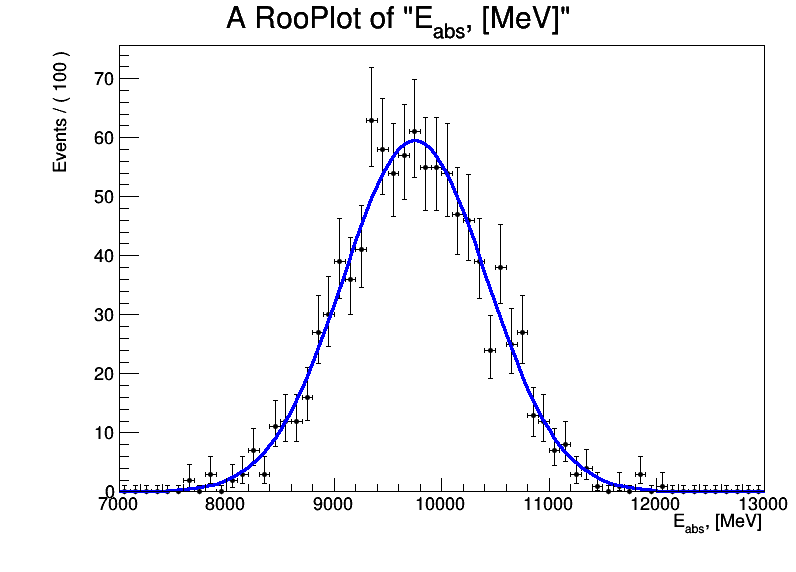

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cB
Info in <TCanvas::Print>: png file images/png/test_for_output_ds.png has been created
Info in <TCanvas::Print>: pdf file images/pdf/test_for_output_ds.pdf has been created


In [43]:
bufram = Ereal.frame(7000,13000,60)

_MYW = 800
_MYH = 600
_MYT = 0.08*_MYH
_MYB = 0.14*_MYH
_MYL = 0.15*_MYW
_MYR = 0.04*_MYW

cB = ROOT.TCanvas('cB','cB',_MYW,_MYH)
cB.SetLeftMargin( _MYL/_MYW )
cB.SetRightMargin( _MYR/_MYW )
cB.SetTopMargin( _MYT/_MYH )
cB.SetBottomMargin( _MYB/_MYH )
cB.SetTickx(0)
cB.SetTicky(0)
bufram.GetYaxis().SetTitleOffset(1.3)

# for i in range(0, 11):
#     ds_list[i].plotOn(bufram, ROOT.RooFit.MarkerSize(0.6), ROOT.RooFit.Name('data'))

ds_red_list[10].plotOn(bufram, ROOT.RooFit.MarkerSize(0.6), ROOT.RooFit.Name('data'))
gaus_red_list[10].plotOn(bufram)
# pdf_ered.plotOn(bufram)
bufram.Draw()

cB.SaveAs('images/png/test_for_output_ds.png')
cB.SaveAs('images/pdf/test_for_output_ds.pdf')
display(Image(filename = 'images/png/test_for_output_ds.png', retina = False, width = 550))

In [55]:
residentials_e = []

for i in range(0, 11):
    res = round(new_energy[i] - mean_red_list[i])
    residentials_e.append(res)
    print(f'{i}-run: real_energy = {new_energy[i]}, recovered energy = {round(mean_red_list[i])} +- {round(sigma_red_list[i])}, delta = {residentials_e[i]}')

0-run: real_energy = 146, recovered energy = 139 +- 3, delta = 7
1-run: real_energy = 539, recovered energy = 551 +- 5, delta = -12
2-run: real_energy = 1027, recovered energy = 1027 +- 7, delta = 0
3-run: real_energy = 2936, recovered energy = 2974 +- 11, delta = -38
4-run: real_energy = 3532, recovered energy = 3542 +- 12, delta = -10
5-run: real_energy = 4134, recovered energy = 4141 +- 14, delta = -7
6-run: real_energy = 5007, recovered energy = 5031 +- 14, delta = -24
7-run: real_energy = 6305, recovered energy = 6324 +- 17, delta = -19
8-run: real_energy = 7175, recovered energy = 7207 +- 18, delta = -32
9-run: real_energy = 8017, recovered energy = 7999 +- 19, delta = 18
10-run: real_energy = 9763, recovered energy = 9750 +- 21, delta = 13


In [71]:
deltaEtoE = []
deltaEtoE_err = []

for i in range(0, 11):
    dEtoE = sigma_g_red_list[i] / mean_red_list[i]
    err = dEtoE * np.sqrt( ((sigma_red_list[i] / mean_red_list[i]) ** 2) + ((sigma_ge_red_list[i] / sigma_g_red_list[i]) ** 2) )
    deltaEtoE.append(dEtoE)
    deltaEtoE_err.append(err)

In [75]:
columns_red_list = ['Energy, MeV', 'Sigma(E), MeV', 'dE/E, MeV', 'Sigma(dE/E), MeV']
df_red = pd.DataFrame(columns = columns_red_list)

for i in range(0, 11):
    a_log_red = [mean_red_list[i], 0, deltaEtoE[i], deltaEtoE_err[i]]
    df_red.loc[i] = a_log_red
    
df_red.to_csv('log_red.csv', index = False)

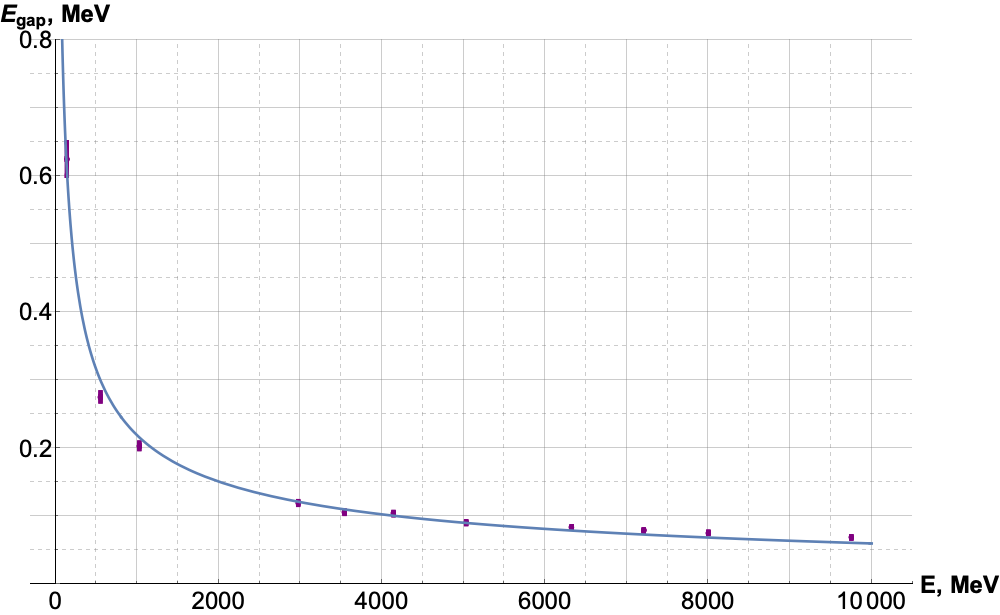

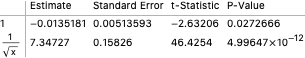

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [84]:
display(Image(filename = 'images/png/re.png', retina = False, width = 550))
display(Image(filename = 'images/png/fit_re_res.png', retina = False, width = 550))
res = pd.read_csv('fit_re_res.csv', header=None)
a_r, b_r = res.iloc[1][0], res.iloc[0][0]
print_math(r'Fit \; function: \quad \frac{\Delta E}{E} = a + \frac{b}{\sqrt{E}},')
print_math(f'Where \quad a = {round(a_r, 5)}, \quad  b = {round(b_r, 5)}')